# Pandas Playbook: Manipulating Data

## Exploring Data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
# shape of the dataframe
df.shape

(8784, 5)

In [4]:
# shows general info about the data frame such as:
# type of index, # of columns and rows,
# how many null values in each column,
# data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH     8784 non-null   int64  
 1   DAY       8784 non-null   int64  
 2   TIME      8784 non-null   int64  
 3   TEMP      8784 non-null   float64
 4   PRESSURE  8784 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 343.2 KB


In [5]:
# show the first n rows
df.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [6]:
# show the last n rows
df.tail()

# we can see that the data is sorted by month day and hour

,MONTH,DAY,TIME,TEMP,PRESSURE
8779,12,366,20,3.5,10265
8780,12,366,21,3.4,10258
8781,12,366,22,3.0,10253
8782,12,366,23,2.8,10246
8783,12,366,24,2.8,10239


### Statistical Exploration

In [7]:
# overal stats of the dataframe
df.describe()

,MONTH,DAY,TIME,TEMP,PRESSURE
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,6.513661,183.500000,12.500000,10.768613,10159.254781
std,3.451430,105.660719,6.922581,6.420003,102.895130
min,1.000000,1.000000,1.000000,-6.500000,9812.000000
25%,4.000000,92.000000,6.750000,6.100000,10102.000000
50%,7.000000,183.500000,12.500000,10.200000,10169.000000
75%,10.000000,275.000000,18.250000,15.900000,10227.000000
max,12.000000,366.000000,24.000000,31.700000,10453.000000


In [8]:
# can ask for these values explicity
df.mean()

MONTH           6.513661
DAY           183.500000
TIME           12.500000
TEMP           10.768613
PRESSURE    10159.254781
dtype: float64

In [9]:
df.max()

MONTH          12.0
DAY           366.0
TIME           24.0
TEMP           31.7
PRESSURE    10453.0
dtype: float64

In [10]:
# can run these on a single column
df['PRESSURE'].min()

9812

In [11]:
df['TEMP'].mode()

0    6.4
dtype: float64

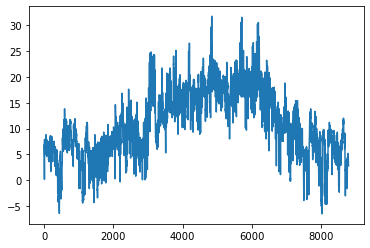

In [12]:
df['TEMP'].plot()

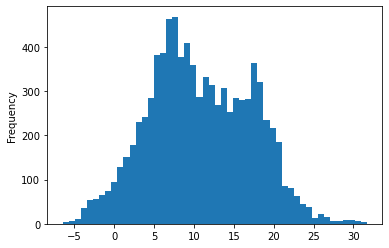

In [13]:
df['TEMP'].plot.hist(bins = 50)

## Selecting, Filtering, and Sorting Data

### Indexing

In [14]:
df.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [15]:
# selecting a single column as a series
df['TEMP']

0       6.8
1       5.8
2       5.7
3       6.0
4       4.5
       ... 
8779    3.5
8780    3.4
8781    3.0
8782    2.8
8783    2.8
Name: TEMP, Length: 8784, dtype: float64

In [16]:
# methods can be called on this series:
df['TEMP'][1]
df['TEMP'].max()

31.7

In [17]:
# different syntax that retrieves a python attribute from an object
# will not work when column names have symbols such as + or spaces
# cannot add columns with this syntax
df.TEMP

# best practice NOT to use this syntax

0       6.8
1       5.8
2       5.7
3       6.0
4       4.5
       ... 
8779    3.5
8780    3.4
8781    3.0
8782    2.8
8783    2.8
Name: TEMP, Length: 8784, dtype: float64

In [18]:
# transpose datafram with .T attribute
# new table where the rows are now columns and columns are rows
dft = df.T
dft

,0,1,2,3,4,5,6,7,8,9,...,8774,8775,8776,8777,8778,8779,8780,8781,8782,8783
MONTH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
DAY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0
TIME,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
TEMP,6.8,5.8,5.7,6.0,4.5,2.0,1.1,0.7,0.2,2.0,...,5.1,4.6,4.1,3.7,3.5,3.5,3.4,3.0,2.8,2.8
PRESSURE,10207.0,10214.0,10220.0,10225.0,10230.0,10237.0,10242.0,10245.0,10248.0,10249.0,...,10288.0,10286.0,10284.0,10277.0,10271.0,10265.0,10258.0,10253.0,10246.0,10239.0


In [19]:
# now are columns are indexes so we must use integers when indexing
# dft.columns
dft[2]

MONTH           1.0
DAY             1.0
TIME            3.0
TEMP            5.7
PRESSURE    10220.0
Name: 2, dtype: float64

In [20]:
# this creates a series from dft[2] and indexes it at row TIME
dft[2]['TIME']

3.0

In [21]:
# this does the same but with the index number
dft[2][2]

3.0

In [22]:
# strange example
t = pd.DataFrame([['John'], ['Bob'], ['Anne']], index = [4, 3, 4])
t

,0
4,John
3,Bob
4,Anne


In [23]:
# numbers are not in a simple range
# rows can only be retrieved by name
t[0][4]

4    John
4    Anne
Name: 0, dtype: object

### Indexing with lists and slices

In [24]:
df

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230
...,...,...,...,...,...
8779,12,366,20,3.5,10265
8780,12,366,21,3.4,10258
8781,12,366,22,3.0,10253
8782,12,366,23,2.8,10246


In [25]:
# select only certain columns with a list
df[['PRESSURE', 'TEMP', 'TIME']]

,PRESSURE,TEMP,TIME
0,10207,6.8,1
1,10214,5.8,2
2,10220,5.7,3
3,10225,6.0,4
4,10230,4.5,5
...,...,...,...
8779,10265,3.5,20
8780,10258,3.4,21
8781,10253,3.0,22
8782,10246,2.8,23


In [26]:
# select a column with a number of rows
# outer brackets mean we are indexing into the dataframe/series
# inner brackets indicate a Python list used to select multiple things at once
df['TIME'][[3, 1, 4]]

3    4
1    2
4    5
Name: TIME, dtype: int64

In [27]:
# using a slice to select rows
df[2:4]

,MONTH,DAY,TIME,TEMP,PRESSURE
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225


In [28]:
# using a slice plus a column selection
df[2:4][['TEMP', 'PRESSURE']]

,TEMP,PRESSURE
2,5.7,10220
3,6.0,10225


In [29]:
# now lets play with the transposed data frame and try and do the same things
dft

,0,1,2,3,4,5,6,7,8,9,...,8774,8775,8776,8777,8778,8779,8780,8781,8782,8783
MONTH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
DAY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0
TIME,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
TEMP,6.8,5.8,5.7,6.0,4.5,2.0,1.1,0.7,0.2,2.0,...,5.1,4.6,4.1,3.7,3.5,3.5,3.4,3.0,2.8,2.8
PRESSURE,10207.0,10214.0,10220.0,10225.0,10230.0,10237.0,10242.0,10245.0,10248.0,10249.0,...,10288.0,10286.0,10284.0,10277.0,10271.0,10265.0,10258.0,10253.0,10246.0,10239.0


In [30]:
# slicing will still select rows
dft[3:]

,0,1,2,3,4,5,6,7,8,9,...,8774,8775,8776,8777,8778,8779,8780,8781,8782,8783
TEMP,6.8,5.8,5.7,6.0,4.5,2.0,1.1,0.7,0.2,2.0,...,5.1,4.6,4.1,3.7,3.5,3.5,3.4,3.0,2.8,2.8
PRESSURE,10207.0,10214.0,10220.0,10225.0,10230.0,10237.0,10242.0,10245.0,10248.0,10249.0,...,10288.0,10286.0,10284.0,10277.0,10271.0,10265.0,10258.0,10253.0,10246.0,10239.0


In [31]:
# use a list to select multiple columns
dft[3:][[2,3]]

,2,3
TEMP,5.7,6.0
PRESSURE,10220.0,10225.0


In [32]:
# get a series from the columns selection and use a slice for the rows
df['PRESSURE'][:4]

0    10207
1    10214
2    10220
3    10225
Name: PRESSURE, dtype: int64

In [33]:
# can use a slice with strings
# note the last value IS INCLUDED in the slice
dft['TIME':'PRESSURE']

,0,1,2,3,4,5,6,7,8,9,...,8774,8775,8776,8777,8778,8779,8780,8781,8782,8783
TIME,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
TEMP,6.8,5.8,5.7,6.0,4.5,2.0,1.1,0.7,0.2,2.0,...,5.1,4.6,4.1,3.7,3.5,3.5,3.4,3.0,2.8,2.8
PRESSURE,10207.0,10214.0,10220.0,10225.0,10230.0,10237.0,10242.0,10245.0,10248.0,10249.0,...,10288.0,10286.0,10284.0,10277.0,10271.0,10265.0,10258.0,10253.0,10246.0,10239.0


### Using loc and iloc

In [34]:
capitals = pd.DataFrame(
    [
    ["Ngerulmud",391,1.87],
    ["Vatican City",826,100],
    ["Yaren",1100,10.91],
    ["Funafuti",4492,45.48],
    ["City of San Marino",4493]
    ], 
    index = ["Palau", "Vatican City", "Nauru", "Tuvalu", "San Marino"],
    columns=['Capital', 'Population', 'Percentage'])

In [35]:
capitals

,Capital,Population,Percentage
Palau,Ngerulmud,391,1.87
Vatican City,Vatican City,826,100.00
Nauru,Yaren,1100,10.91
Tuvalu,Funafuti,4492,45.48
San Marino,City of San Marino,4493,NaN


In [36]:
# loc vs chained indexing
# loc is just one operation
capitals.loc['Nauru', 'Population']

1100

In [37]:
# chained indexing
# involves two operations
capitals['Population']['Nauru']

1100

In [38]:
# indexing with loc using a slice for rows and list for columns
capitals.loc['Palau':'Nauru', ['Population', 'Percentage']]

,Population,Percentage
Palau,391,1.87
Vatican City,826,100.00
Nauru,1100,10.91


In [39]:
# this can be reversed
capitals.loc[['Palau', 'Nauru'], 'Capital': 'Population']

,Capital,Population
Palau,Ngerulmud,391
Nauru,Yaren,1100


In [40]:
#can just pass a single argument
capitals.loc[['San Marino', 'Vatican City']]

,Capital,Population,Percentage
San Marino,City of San Marino,4493,NaN
Vatican City,Vatican City,826,100.0


In [41]:
capitals.loc[:,['Population', 'Percentage']]

,Population,Percentage
Palau,391,1.87
Vatican City,826,100.00
Nauru,1100,10.91
Tuvalu,4492,45.48
San Marino,4493,NaN


In [42]:
# to use indexes we must use iloc
capitals.iloc[[4,1]]

,Capital,Population,Percentage
San Marino,City of San Marino,4493,NaN
Vatican City,Vatican City,826,100.0


In [43]:
# can select a single column
capitals.iloc[:,2]

Palau             1.87
Vatican City    100.00
Nauru            10.91
Tuvalu           45.48
San Marino         NaN
Name: Percentage, dtype: float64

### Boolean Filtering

In [44]:
capitals

,Capital,Population,Percentage
Palau,Ngerulmud,391,1.87
Vatican City,Vatican City,826,100.00
Nauru,Yaren,1100,10.91
Tuvalu,Funafuti,4492,45.48
San Marino,City of San Marino,4493,NaN


In [45]:
# indexes the rows and returns the ones located at true [0, 1, 3]
capitals[[True, True, False, True, False]]

,Capital,Population,Percentage
Palau,Ngerulmud,391,1.87
Vatican City,Vatican City,826,100.00
Tuvalu,Funafuti,4492,45.48


In [46]:
# select only the rows which have capitals that account for > 25% of the population
capitals['Percentage'] > 25

Palau           False
Vatican City     True
Nauru           False
Tuvalu           True
San Marino      False
Name: Percentage, dtype: bool

In [47]:
capitals[capitals['Percentage'] > 25]

,Capital,Population,Percentage
Vatican City,Vatican City,826,100.00
Tuvalu,Funafuti,4492,45.48


In [48]:
grades = pd.DataFrame([[6, 4], [7, 8], [6, 7], [6, 5], [5, 2]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2'])
grades

,test_1,test_2
Mary,6,4
John,7,8
Ann,6,7
Pete,6,5
Laura,5,2


In [49]:
# select the students whose performance did not improve
# displays boolean
grades['test_2'] <= grades['test_1']

Mary      True
John     False
Ann      False
Pete      True
Laura     True
dtype: bool

In [50]:
# use that boolean as an indexing function to return this dataframe
grades[grades['test_2'] <= grades['test_1']]

,test_1,test_2
Mary,6,4
Pete,6,5
Laura,5,2


In [51]:
# show only the tests that have an average of over 5.5
# grades.mean() calculates the mean of the columns and compares it the the value 5.5
grades.loc[:, grades.mean() > 5.5]

,test_1
Mary,6
John,7
Ann,6
Pete,6
Laura,5


### Assigning Values

In [52]:
# increase two grades by 1
grades.loc[['Laura', 'John'], 'test_2'] += 1
grades

,test_1,test_2
Mary,6,4
John,7,9
Ann,6,7
Pete,6,5
Laura,5,3


In [53]:
# change a whole column
grades['test_1'] += .5

In [54]:
grades

,test_1,test_2
Mary,6.5,4
John,7.5,9
Ann,6.5,7
Pete,6.5,5
Laura,5.5,3


In [55]:
grades.loc['Mary'] += 2

In [56]:
grades

,test_1,test_2
Mary,8.5,6.0
John,7.5,9.0
Ann,6.5,7.0
Pete,6.5,5.0
Laura,5.5,3.0


In [57]:
# update multiple values with list
grades.loc['Pete'] = [7,8]
grades

,test_1,test_2
Mary,8.5,6.0
John,7.5,9.0
Ann,6.5,7.0
Pete,7.0,8.0
Laura,5.5,3.0


In [58]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Mary to Laura
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test_1  5 non-null      float64
 1   test_2  5 non-null      float64
dtypes: float64(2)
memory usage: 280.0+ bytes


In [59]:
# thid doesnt work for me now, but maybe it will once i learn how to change datatypes
failing = grades < 6
passing = grades >= 6
grades[failing] = 'Fail'
grades[passing] = 'Pass'
grades

,test_1,test_2
Mary,Pass,Pass
John,Pass,Pass
Ann,Pass,Pass
Pete,Pass,Pass
Laura,Fail,Fail


In [60]:
grades = pd.DataFrame([[6, 4], [7, 8], [6, 7], [6, 5], [5, 2]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2'])
grades

,test_1,test_2
Mary,6,4
John,7,8
Ann,6,7
Pete,6,5
Laura,5,2


In [61]:
# find the average for each student
grades.mean(axis = 1) > 6

Mary     False
John      True
Ann       True
Pete     False
Laura    False
dtype: bool

In [62]:
grades['passed'] = grades.mean(axis=1) > 6

In [63]:
grades

,test_1,test_2,passed
Mary,6,4,False
John,7,8,True
Ann,6,7,True
Pete,6,5,False
Laura,5,2,False


In [64]:
grades.loc['Ann', 'test_2'] = 8

In [65]:
grades

,test_1,test_2,passed
Mary,6,4,False
John,7,8,True
Ann,6,8,True
Pete,6,5,False
Laura,5,2,False


### Sorting

In [66]:
# sort by index, does not change OG df
capitals.sort_index()

,Capital,Population,Percentage
Nauru,Yaren,1100,10.91
Palau,Ngerulmud,391,1.87
San Marino,City of San Marino,4493,NaN
Tuvalu,Funafuti,4492,45.48
Vatican City,Vatican City,826,100.00


In [67]:
# this will sort our OG datafram
capitals.sort_index(inplace=True)

In [68]:
capitals

,Capital,Population,Percentage
Nauru,Yaren,1100,10.91
Palau,Ngerulmud,391,1.87
San Marino,City of San Marino,4493,NaN
Tuvalu,Funafuti,4492,45.48
Vatican City,Vatican City,826,100.00


In [69]:
# reverse sort
capitals.sort_index(inplace=True, ascending = False)

In [70]:
capitals

,Capital,Population,Percentage
Vatican City,Vatican City,826,100.00
Tuvalu,Funafuti,4492,45.48
San Marino,City of San Marino,4493,NaN
Palau,Ngerulmud,391,1.87
Nauru,Yaren,1100,10.91


In [71]:
# sort by column
capitals.sort_index(axis=1)

,Capital,Percentage,Population
Vatican City,Vatican City,100.00,826
Tuvalu,Funafuti,45.48,4492
San Marino,City of San Marino,NaN,4493
Palau,Ngerulmud,1.87,391
Nauru,Yaren,10.91,1100


In [72]:
# sort by the values in a column
capitals.sort_values(by='Percentage')

,Capital,Population,Percentage
Palau,Ngerulmud,391,1.87
Nauru,Yaren,1100,10.91
Tuvalu,Funafuti,4492,45.48
Vatican City,Vatican City,826,100.00
San Marino,City of San Marino,4493,NaN


In [73]:
# sort by a second column
grades.sort_values(by=['test_1', 'test_2'])

,test_1,test_2,passed
Laura,5,2,False
Mary,6,4,False
Pete,6,5,False
Ann,6,8,True
John,7,8,True


## Cleaning Data

In [74]:
df = pd.read_csv('weather_m4.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8784 non-null   int64  
 1   TIME             8784 non-null   int64  
 2   TEMP             8784 non-null   int64  
 3   MIN_TEMP_GROUND  1464 non-null   float64
 4   PRESSURE         8784 non-null   int64  
 5   HUMIDITY         8784 non-null   int64  
 6   VIEW_RANGE       8743 non-null   float64
 7   CLOUD            8743 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
 13  WEATHER_CODE     3862 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 960.9 KB


### Finding Missing Data

In [75]:
df[['MIN_TEMP_GROUND']].head(30)
# data only observed once every six hours

,MIN_TEMP_GROUND
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,3.0
6,NaN
7,NaN
8,NaN
9,NaN


In [76]:
df.head(10)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
6,20160101,7,11,NaN,10242,99,5.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
7,20160101,8,7,NaN,10245,100,1.0,0.0,1.0,0.0,0.0,0.0,1.0,34.0
8,20160101,9,2,NaN,10248,99,2.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0
9,20160101,10,20,NaN,10249,100,5.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0


In [77]:
#check for null values by returning a data frame
df.isnull()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8780,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8781,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8782,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [78]:
# just check to see which columns have any null values
df.isnull().any()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND     True
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
WEATHER_CODE        True
dtype: bool

In [79]:
# check for the rows
df.isnull().any(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
8779     True
8780     True
8781     True
8782     True
8783    False
Length: 8784, dtype: bool

In [80]:
# we can use this list of booleans to select those rows
df[df.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,20161231,19,35,NaN,10271,98,7.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
8779,20161231,20,35,NaN,10265,98,11.0,8.0,1.0,0.0,0.0,0.0,0.0,20.0
8780,20161231,21,34,NaN,10258,98,9.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
8781,20161231,22,30,NaN,10253,98,9.0,9.0,1.0,1.0,0.0,0.0,0.0,33.0


In [81]:
# are there any columns that contain only null values?
df.isnull().all()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND    False
PRESSURE           False
HUMIDITY           False
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [82]:
# are there any rows that contain only null values?
df.isnull().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

In [83]:
# thats a long list! We can add the .any() function to it!
df.isnull().all(axis=1).any()

False

In [84]:
# notnull returns the opposite
df.notnull().all()

YYYYMMDD            True
TIME                True
TEMP                True
MIN_TEMP_GROUND    False
PRESSURE            True
HUMIDITY            True
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [85]:
df[['MIN_TEMP_GROUND']].head(20)

,MIN_TEMP_GROUND
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,3.0
6,NaN
7,NaN
8,NaN
9,NaN


In [86]:
# check that indeed this is taken every 6 rows (hours)
# make a list of all positions in the column where there should be a number
every_6th_row = pd.Series(range(5, len(df), 6))

In [87]:
# use our list of positions to index the column and check they are not null
df['MIN_TEMP_GROUND'][every_6th_row].notnull().all()

True

In [88]:
# double check that we have it right and all other values are empty
df['MIN_TEMP_GROUND'].drop(every_6th_row).isnull().all()

True

### Handling Missing Values

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8784 non-null   int64  
 1   TIME             8784 non-null   int64  
 2   TEMP             8784 non-null   int64  
 3   MIN_TEMP_GROUND  1464 non-null   float64
 4   PRESSURE         8784 non-null   int64  
 5   HUMIDITY         8784 non-null   int64  
 6   VIEW_RANGE       8743 non-null   float64
 7   CLOUD            8743 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
 13  WEATHER_CODE     3862 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 960.9 KB


In [90]:
# remove a column (weather type has coded values that are useless)
df.drop(columns='WEATHER_CODE', inplace = True)

In [91]:
df

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20161231,20,35,NaN,10265,98,11.0,8.0,1.0,0.0,0.0,0.0,0.0
8780,20161231,21,34,NaN,10258,98,9.0,9.0,1.0,0.0,0.0,0.0,0.0
8781,20161231,22,30,NaN,10253,98,9.0,9.0,1.0,1.0,0.0,0.0,0.0
8782,20161231,23,28,NaN,10246,98,6.0,9.0,1.0,1.0,0.0,0.0,0.0


In [92]:
# the 'ffill' method will fill all the values after a value until it meets the next one
# we actual want to fill backwards so we will use bfill, and add inplace true to save it
df['MIN_TEMP_GROUND'].fillna(method='bfill', inplace=True)

In [93]:
#check to see we took care of that column (MIN_TEMP_GROUND is now False)
df.isnull().any()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND    False
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
dtype: bool

In [94]:
df[df.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,95.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,110.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,110.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,110.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,110.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,110.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df[df.isnull().any(axis=1)].shape

(43, 13)

In [96]:
# find the dates with these NaNs
df.loc[df.isnull().any(axis=1), 'YYYYMMDD']

5306    20160809
5307    20160809
5308    20160809
5309    20160809
5310    20160809
5311    20160809
5312    20160809
5313    20160809
5314    20160809
5315    20160809
5316    20160809
5317    20160809
5596    20160821
5597    20160821
5598    20160821
5599    20160821
5600    20160821
5601    20160821
5602    20160821
5603    20160821
5604    20160821
5605    20160821
5606    20160821
5607    20160821
5608    20160821
5609    20160821
5610    20160821
5611    20160821
5612    20160821
5613    20160821
5614    20160821
5615    20160821
5616    20160822
5617    20160822
5618    20160822
5619    20160822
5620    20160822
5621    20160822
5622    20160822
5623    20160822
5624    20160822
5625    20160822
5626    20160822
Name: YYYYMMDD, dtype: int64

In [97]:
df.loc[df.isnull().any(axis=1), 'YYYYMMDD'].value_counts()
# seems there are three days for which we are missing a lot of data
# we may just want to drop all of these

20160821    20
20160809    12
20160822    11
Name: YYYYMMDD, dtype: int64

##### Dropping NaN

In [98]:
# we can simply drop the columns
# note if we wanted that to be permanent we would use inplace=True
null_dropped = df.dropna()

In [99]:
null_dropped.info()
# all columns have non-null values, but the index still goes to 8783
# data is not nicely continuous

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8741 non-null   int64  
 1   TIME             8741 non-null   int64  
 2   TEMP             8741 non-null   int64  
 3   MIN_TEMP_GROUND  8741 non-null   float64
 4   PRESSURE         8741 non-null   int64  
 5   HUMIDITY         8741 non-null   int64  
 6   VIEW_RANGE       8741 non-null   float64
 7   CLOUD            8741 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 956.0 KB


In [100]:
null_dropped[5300:5310]
# there is a break in the indices at 5305
# positions and index number no longer match up

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5300,20160808,21,131,124.0,10211,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5301,20160808,22,133,124.0,10209,97,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5302,20160808,23,135,124.0,10209,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5303,20160808,24,136,124.0,10208,94,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5304,20160809,1,141,95.0,10205,89,70.0,8.0,0.0,0.0,0.0,0.0,0.0
5305,20160809,2,123,95.0,10199,92,65.0,1.0,0.0,0.0,0.0,1.0,0.0
5318,20160809,15,143,135.0,10234,85,59.0,8.0,0.0,1.0,0.0,0.0,0.0
5319,20160809,16,160,135.0,10231,65,80.0,2.0,0.0,1.0,0.0,0.0,0.0
5320,20160809,17,156,135.0,10231,62,80.0,0.0,0.0,0.0,0.0,0.0,0.0
5321,20160809,18,140,135.0,10227,72,75.0,1.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# use thresh to set how many measurements must be present in a row in order to keep it
drop_thresh = df.dropna(thresh = 7)
drop_thresh[drop_thresh.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5317,20160809,14,167,135.0,10233,65,80.0,2.0,NaN,NaN,NaN,NaN,NaN
5626,20160822,11,193,175.0,10233,88,65.0,8.0,NaN,NaN,NaN,NaN,NaN


In [102]:
drop_thresh.fillna(0, inplace=True)
drop_thresh[drop_thresh.isnull().any(axis=1)]

C:\Users\Student\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE


##### Filling NaN

In [103]:
# returning to the OG dataset 
# create a variable of all the rows left to fill
rows_to_fill = df.isnull().any(axis=1)
df[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,95.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,110.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,110.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,110.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,110.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,110.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# fill with mean values, assign to a variable
null_filled = df.fillna(df.mean())

In [105]:
# we cant find these rows using .isna() anymore but we can use the variable we saved earlier
null_filled[rows_to_fill]
# there is an issue here:
# cols MIST -> ICE should only be 1 or 0 (perhaps we should have put in mode?)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5307,20160809,4,107,95.0,10206,93,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5308,20160809,5,104,95.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5309,20160809,6,115,95.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5310,20160809,7,125,110.0,10211,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5311,20160809,8,144,110.0,10217,75,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5312,20160809,9,148,110.0,10222,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5313,20160809,10,156,110.0,10228,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5314,20160809,11,153,110.0,10230,65,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5315,20160809,12,161,110.0,10231,60,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016


In [106]:
# filling with mode instead, this is a specific way it must be done per documentation
df.fillna(df.mode().iloc[0], inplace=True)

In [107]:
df[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5307,20160809,4,107,95.0,10206,93,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5308,20160809,5,104,95.0,10210,80,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5309,20160809,6,115,95.0,10210,80,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5310,20160809,7,125,110.0,10211,70,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5311,20160809,8,144,110.0,10217,75,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5312,20160809,9,148,110.0,10222,70,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5313,20160809,10,156,110.0,10228,70,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5314,20160809,11,153,110.0,10230,65,75.0,8.0,0.0,0.0,0.0,0.0,0.0
5315,20160809,12,161,110.0,10231,60,75.0,8.0,0.0,0.0,0.0,0.0,0.0


### Removing Outliers

In [108]:
athletes = pd.read_csv('athletes.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11543 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11543 non-null  int64  
 1   nationality  11543 non-null  object 
 2   sex          11543 non-null  object 
 3   height       11213 non-null  float64
 4   weight       10884 non-null  float64
 5   sport        11543 non-null  object 
 6   gold         11543 non-null  object 
 7   silver       11543 non-null  object 
 8   bronze       11543 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 811.7+ KB


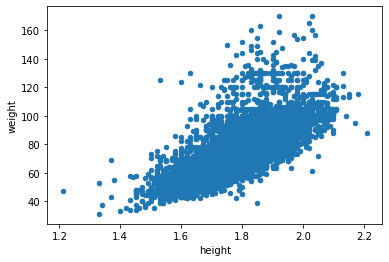

In [109]:
athletes.plot.scatter(x='height', y='weight')

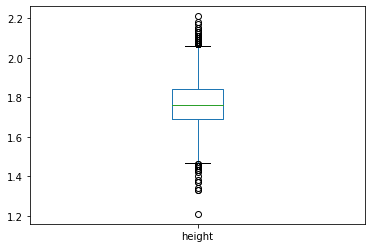

In [110]:
# remove athletes that are too tall or short
heights = athletes['height']
heights.plot.box()

In [111]:
# calculate IQR and use this to define min and max
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
# create a new df with NaN values instead of the heights so we don't lose all the rows of data
# .where replaces everything outside of the range with NaN
nwh = heights.where(heights.between(pmin, pmax))
# this next function would replace them with the mean
# nwh = heighs.where(heights.between(pmin, pmax), heights.mean())

In [112]:
# now we can compare the two dataframes
compare = pd.DataFrame({'before':heights, 'after': nwh})

,before,after
count,11213.000000,11121.000000
mean,1.766294,1.765098
std,0.112702,0.108867
min,1.210000,1.470000
25%,1.690000,1.690000
50%,1.760000,1.760000
75%,1.840000,1.840000
max,2.210000,2.060000


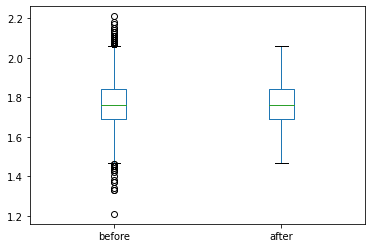

In [113]:
compare.plot.box()
compare.describe()

In [114]:
# now we change it permanently
heights.where(heights.between(pmin, pmax), inplace=True)

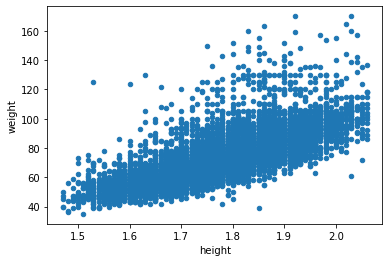

In [115]:
athletes.plot.scatter(x='height', y='weight')

### Removing Duplicates

In [116]:
# check for any duplicated rows
athletes.duplicated().any()

True

In [117]:
# show the rows that are duplicated
athletes[athletes.duplicated()]

,id,nationality,sex,height,weight,sport,gold,silver,bronze
3224,277821751,RUS,female,1.76,67.0,aquatics,0,0,1
3813,96493170,GER,male,1.82,78.0,football,0,1,0
5676,891867859,USA,male,1.88,86.0,athletics,1,0,0
9695,848761398,COL,male,1.70,61.0,cycling,0,0,0
10774,1152723,GRE,female,1.81,70.0,fencing,0,0,0


In [118]:
# drop duplicates permanently
athletes.drop_duplicates(inplace=True)
# then go back to cell[168] and rerun to the code to confirm they are gone

In [119]:
# what if we wanted to look at a list of the countries, but don't want to see duplicates
# can leave the sort values off if we want
athletes['nationality'].drop_duplicates().sort_values()
# df.unique() returns a numpy array and is not as useful as the series of booleans

51      AFG
1630    ALB
27      ALG
3161    AND
275     ANG
       ... 
4198    VIE
1589    VIN
7699    YEM
1440    ZAM
831     ZIM
Name: nationality, Length: 207, dtype: object

In [120]:
# what if we want to see how many people each country sent?
athletes['nationality'].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
LBR      2
GEQ      2
SOM      2
SWZ      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [121]:
# ratio of men to women
athletes['sex'].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

### Data Type Conversions

In [122]:
athletes.info()
# most of these have type object which is usually strings but based on the table they should not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  object 
 7   silver       11538 non-null  object 
 8   bronze       11538 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 901.4+ KB


In [123]:
athletes[['gold', 'silver', 'bronze']].head()

,gold,silver,bronze
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [124]:
# athletes['bronze'].astype(int)
# when we first type this in we find we have the letter 'O' in a cell instead of '0'

# lets take care of that values
athletes[athletes['bronze'] == 'O']

,id,nationality,sex,height,weight,sport,gold,silver,bronze
7521,666617738,RUS,male,1.71,72.0,canoe,O,O,O


In [125]:
# copy the row number to change the values using loc
athletes.loc[7521, ['gold', 'silver', 'bronze']] = 0

In [126]:
# now we can try and convert the data types of all three columns
athletes[['gold', 'silver', 'bronze']] = athletes[['gold', 'silver', 'bronze']].astype(int)

In [127]:
athletes[['gold', 'silver', 'bronze']].sum()

gold      666
silver    655
bronze    704
dtype: int64

In [128]:
athletes.info()
# weights are given in whole kg but its a float
# this is because there are NaN values and these cannot be integers
# we will just have to live with this, its a limitation of pandas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  int32  
 7   silver       11538 non-null  int32  
 8   bronze       11538 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 1.1+ MB


### Fixing Indices

In [129]:
athletes.head()
# we can see that there is already an id column, so we can make that the index

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [130]:
athletes.index = athletes['id']
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze
id,,,,,,,,,
736041664,736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [131]:
# now the id column is still there
# we could use a set_index() function instead
athletes.set_index('id', drop=True, inplace=True)
athletes.head()

,nationality,sex,height,weight,sport,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [132]:
# changing column names
athletes.rename(
    columns={'nationality':'country', 'sport': 'discipline'},
    inplace = True)
# use index instead of columns to change row index names

In [133]:
athletes.head()

,country,sex,height,weight,discipline,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [134]:
df = pd.read_csv('weather_m4.csv')

In [135]:
# drop hella rows with NaN but still have super high index number
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 5 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         831 non-null    int64  
 1   TIME             831 non-null    int64  
 2   TEMP             831 non-null    int64  
 3   MIN_TEMP_GROUND  831 non-null    float64
 4   PRESSURE         831 non-null    int64  
 5   HUMIDITY         831 non-null    int64  
 6   VIEW_RANGE       831 non-null    float64
 7   CLOUD            831 non-null    float64
 8   MIST             831 non-null    float64
 9   RAIN             831 non-null    float64
 10  SNOW             831 non-null    float64
 11  THUNDER          831 non-null    float64
 12  ICE              831 non-null    float64
 13  WEATHER_CODE     831 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 97.4 KB


In [136]:
# check out the gaps on that index
df.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
11,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
17,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
29,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
35,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0


In [137]:
# super awesome formula for this
# include drop=True or else the old index will become a new column
df.reset_index(drop=True)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
1,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
3,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
4,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20161230,24,40,32.0,10340,93,37.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
827,20161231,6,29,29.0,10326,99,3.0,9.0,1.0,0.0,0.0,0.0,0.0,33.0
828,20161231,12,45,29.0,10307,98,21.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
829,20161231,18,37,37.0,10277,98,8.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0


## Transforming Data

In [138]:
import numpy as np
import pandas as pd

#### Applying Mathematical Operations to Data Frames

In [139]:
df = pd.DataFrame(np.ones([5,4]), columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [140]:
# apply operator to entire data frame
df * 2
# does not save the new data frame

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0


In [141]:
# to make the change permanently
df *= 2
df

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0


In [142]:
# operate on a single row
df.loc[1] /=2

In [143]:
df

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0


In [144]:
# operate on just a column
df['b'] -= 1
df

,a,b,c,d
0,2.0,1.0,2.0,2.0
1,1.0,0.0,1.0,1.0
2,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0
4,2.0,1.0,2.0,2.0


In [145]:
# create dataframe with non-continuous index
df2 = pd.DataFrame(np.ones([3,2]), columns = ['d', 'd'], index = [2, 4, 5])
df2

,d,d
2,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [146]:
# add these together
# df + df2
# df.add(df2)
# df - df2
# df * df2
# this causes my notebook to freeze until I stop the kernel

In [147]:
df.loc[2] * df2.loc[5]

a    NaN
b    NaN
c    NaN
d    2.0
d    2.0
dtype: float64

In [148]:
df.mean()

a    1.8
b    0.8
c    1.8
d    1.8
dtype: float64

In [149]:
# here i can subtract the series just fine
df - df.mean()

,a,b,c,d
0,0.2,0.2,0.2,0.2
1,-0.8,-0.8,-0.8,-0.8
2,0.2,0.2,0.2,0.2
3,0.2,0.2,0.2,0.2
4,0.2,0.2,0.2,0.2


In [150]:
df - pd.Series({'a':5, 'b':5, 'e':5, 'f':5})

,a,b,c,d,e,f
0,-3.0,-4.0,NaN,NaN,NaN,NaN
1,-4.0,-5.0,NaN,NaN,NaN,NaN
2,-3.0,-4.0,NaN,NaN,NaN,NaN
3,-3.0,-4.0,NaN,NaN,NaN,NaN
4,-3.0,-4.0,NaN,NaN,NaN,NaN


In [151]:
# applying operations on rows instead of columns
df - df.mean(axis=1)
# this doesn't work well, must use the methods

,a,b,c,d,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# this will subtrace the row-wise mean from each row
df.sub(df.mean(axis=1), axis=0)

,a,b,c,d
0,0.25,-0.75,0.25,0.25
1,0.25,-0.75,0.25,0.25
2,0.25,-0.75,0.25,0.25
3,0.25,-0.75,0.25,0.25
4,0.25,-0.75,0.25,0.25


#### Applying Functions

In [153]:
df = pd.DataFrame({'sin': np.arange(0, 5*np.pi, 0.01),
                  'cos': np.arange(0.5*np.pi, 5.5*np.pi, 0.01)})
df

,sin,cos
0,0.00,1.570796
1,0.01,1.580796
2,0.02,1.590796
3,0.03,1.600796
4,0.04,1.610796
...,...,...
1566,15.66,17.230796
1567,15.67,17.240796
1568,15.68,17.250796
1569,15.69,17.260796


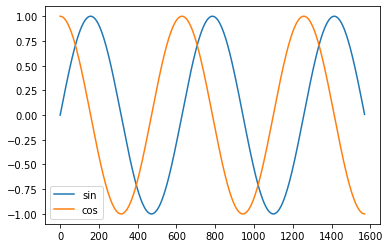

In [154]:
# apply sin() operation to the df
df = np.sin(df)
df.plot()

In [155]:
# apply our own function

# define the function
# applies to columns
def iqr(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    return q3 - q1

df.apply(iqr)
# can use df.apply(iqr, axis=1) to apply row-wise, but does not make sense in this situation

sin    1.347237
cos    1.413649
dtype: float64

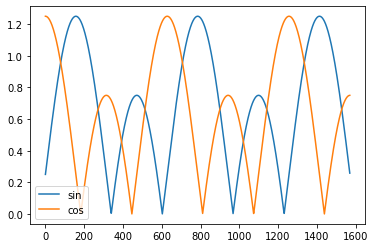

In [156]:
# how to apply to every value
def somefunc(x):
    return np.abs(x+.25)

df.applymap(somefunc).plot()

### Grouping and Aggregation using groupby()

In [159]:
athletes = pd.read_csv('athletes_1.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11538 non-null  int64  
 1   name           11538 non-null  object 
 2   nationality    11538 non-null  object 
 3   sex            11538 non-null  object 
 4   date_of_birth  11538 non-null  object 
 5   height         11208 non-null  float64
 6   weight         10879 non-null  float64
 7   sport          11538 non-null  object 
 8   gold           11538 non-null  int64  
 9   silver         11538 non-null  int64  
 10  bronze         11538 non-null  int64  
 11  info           131 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [163]:
# define the groupby object
g = athletes.groupby('nationality')

In [164]:
# perform a calculation on that object
g.sum()
#index is now nationality

,id,height,weight,gold,silver,bronze
nationality,,,,,,
AFG,544720346,5.21,222.0,0,0,0
ALB,3224936557,10.57,404.0,0,0,0
ALG,34523048655,119.43,4219.0,0,2,0
AND,3059131853,8.56,320.0,0,0,0
ANG,10511499494,45.82,1907.0,0,0,0
...,...,...,...,...,...,...
VIE,10541691287,38.27,1360.0,1,1,0
VIN,2891918513,3.51,120.0,0,0,0
YEM,2482979326,5.09,194.0,0,0,0


In [167]:
# select columns of interest by indexing
g = athletes.groupby('nationality')[['gold', 'silver', 'bronze']]
g.sum().head(25)

,gold,silver,bronze
nationality,,,
AFG,0,0,0
ALB,0,0,0
ALG,0,2,0
AND,0,0,0
ANG,0,0,0
ANT,0,0,0
ARG,21,1,0
ARM,1,3,0
ARU,0,0,0


In [170]:
# check out the mean weight and height by sport
g = athletes.groupby('sport')[['weight', 'height']]
g.mean()

,weight,height
sport,,
aquatics,72.301644,1.788338
archery,72.190476,1.735952
athletics,67.717727,1.751922
badminton,68.774390,1.745529
basketball,87.750000,1.918715
boxing,NaN,1.747745
canoe,77.015291,1.781006
cycling,67.820717,1.746667
equestrian,67.493023,1.748704


In [171]:
g = athletes.groupby(['sport', 'sex'])[['weight', 'height']]
g.mean()

weight    height
sport             sex                         
aquatics          female   62.284483  1.715712
                  male     82.219061  1.860342
archery           female   64.301587  1.676190
                  male     80.079365  1.795714
athletics         female   60.152542  1.690500
                  male     74.777680  1.809234
badminton         female   61.209877  1.686000
                  male     76.156627  1.805059
basketball        female   75.377622  1.833819
                  male    100.297872  2.003611
boxing            female         NaN  1.682222
                  male           NaN  1.757615
canoe             female   66.457944  1.700648
                  male     82.150000  1.820455
cycling           female   60.207254  1.673128
                  male     72.576052  1.793074
equestrian        female   58.634146  1.682530
                  male     72.954887  1.790000
fencing           female   62.733871  1.712581
                  male     78.785124  1.833802
football          female   61.061069  1.682710
                  male     74.451713  1.793746
golf              female   63.200000  1.691404
                  male     79.000000  1.793500
gymnastics        female   49.555024  1.616524
                  male     63.254545  1.677105
handball          female   70.789157  1.759722
                  male     95.431694  1.913169
hockey            female   60.425926  1.667870
                  male     77.375000  1.800093
judo              female   65.392157  1.665132
                  male     84.616740  1.781783
modern pentathlon female   58.000000  1.699444
                  male     73.916667  1.825278
rowing            female   69.776190  1.773286
                  male     86.504615  1.898708
rugby sevens      female   66.595890  1.678552
                  male     90.450331  1.829145
sailing           female   63.194969  1.692767
                  male     77.122066  1.812770
shooting          female   62.675676  1.648400
                  male     81.068966  1.780343
table tennis      female   57.530120  1.653659
                  male     72.558140  1.786860
taekwondo         female   61.258065  1.730159
                  male     74.809524  1.863750
tennis            female   64.670455  1.734205
                  male     80.417476  1.860388
triathlon         female   54.563636  1.676545
                  male     66.814815  1.788704
volleyball        female   70.684211  1.828691
                  male     89.421875  1.964010
weightlifting     female   68.788462  1.603558
                  male     87.538961  1.709221
wrestling         female   61.805310  1.651239
                  male     85.372881  1.757215

### Structural Transformation

##### stack() and unstack()

In [174]:
m = pd.read_csv('monthly_data.csv')
m

,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
0,2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
1,2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2,2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
3,2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
4,2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
5,2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
6,2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
7,2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
8,2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159
9,2017,10228,10151,10154,10211,10170,10134,10141,10162,10135,10176,10141,10120,10160


In [175]:
# if we wanted to plot changes over time, we would want the values for the years to be organized in columns, not rows
# we also want to remove the year column and set it as the index
m.set_index('YYYY', inplace=True)
m

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
YYYY,,,,,,,,,,,,,
2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159


In [176]:
# calling the stack() method will move all the data from the rows into a single column
m.stack()
# creates a multi-level index

YYYY      
2008  JAN     10140
      FEB     10239
      MAR     10050
      APR     10111
      MAY     10159
              ...  
2017  SEP     10135
      OCT     10176
      NOV     10141
      DEC     10120
      YEAR    10160
Length: 130, dtype: int64

In [177]:
# sum of all the data
m.stack().sum()

1319751

In [178]:
w = athletes.groupby(['sport', 'sex'])['weight'].mean()

In [179]:
w

sport              sex   
aquatics           female     62.284483
                   male       82.219061
archery            female     64.301587
                   male       80.079365
athletics          female     60.152542
                   male       74.777680
badminton          female     61.209877
                   male       76.156627
basketball         female     75.377622
                   male      100.297872
boxing             female           NaN
                   male             NaN
canoe              female     66.457944
                   male       82.150000
cycling            female     60.207254
                   male       72.576052
equestrian         female     58.634146
                   male       72.954887
fencing            female     62.733871
                   male       78.785124
football           female     61.061069
                   male       74.451713
golf               female     63.200000
                   male       79.000000
gymnastics    

In [180]:
# move the columns back into rows with unstack()
w.unstack()
# by default it moves the inner index to the columns

sex,female,male
sport,,
aquatics,62.284483,82.219061
archery,64.301587,80.079365
athletics,60.152542,74.777680
badminton,61.209877,76.156627
basketball,75.377622,100.297872
boxing,NaN,NaN
canoe,66.457944,82.150000
cycling,60.207254,72.576052
equestrian,58.634146,72.954887


##### Reshaping Rows and Columns with pivot()

In [186]:
p = pd.DataFrame({'id': [823905, 823905, 235897, 235897, 235897, 983422, 983422],
                'item': ['price', 'unit', 'price', 'unit', 'stock', 'price', 'stock'],
               'value': [3.49, 'kg', 12.89, 'L', 50, 0.49, 4]})
p

,id,item,value
0,823905,price,3.49
1,823905,unit,kg
2,235897,price,12.89
3,235897,unit,L
4,235897,stock,50
5,983422,price,0.49
6,983422,stock,4


In [201]:
# lets say we want only one row per item
# first argument = index
# second argument = column names
# third argument = values, can be left out here for same result
p.pivot('id', 'item', 'value')

item,price,stock,unit
id,,,
235897,12.89,50,L
823905,3.49,NaN,kg
983422,0.49,4,NaN


In [197]:
# new df
grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades

,test_1,test_2,test_3
Mary,6,4,5
John,7,8,7
Ann,6,7,9
Pete,6,5,5
Laura,5,2,7


In [198]:
# what if we want all the grades in a list by test?
grades.melt()
# lost info about the students

,variable,value
0,test_1,6
1,test_1,7
2,test_1,6
3,test_1,6
4,test_1,5
5,test_2,4
6,test_2,8
7,test_2,7
8,test_2,5
9,test_2,2


In [199]:
# so we can reset the index so now we have a column named index with our names
grades.reset_index(inplace=True)
grades

,index,test_1,test_2,test_3
0,Mary,6,4,5
1,John,7,8,7
2,Ann,6,7,9
3,Pete,6,5,5
4,Laura,5,2,7


In [200]:
# now we let the melt function know to set the id as the name now
# we are telling pandas that we want to know what test the value belongs to AND what name
grades.melt(id_vars=['index'])

,index,variable,value
0,Mary,test_1,6
1,John,test_1,7
2,Ann,test_1,6
3,Pete,test_1,6
4,Laura,test_1,5
5,Mary,test_2,4
6,John,test_2,8
7,Ann,test_2,7
8,Pete,test_2,5
9,Laura,test_2,2


### Combining Datasets

In [202]:
grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades

,test_1,test_2,test_3
Mary,6,4,5
John,7,8,7
Ann,6,7,9
Pete,6,5,5
Laura,5,2,7


In [204]:
# adding a series as a new column
grades['test_4'] = pd.Series({'John': 5, 'Ann': 8, 'Pete': 9, 'Mary': 7, 'Laura': 10})
grades

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10


In [ ]:
# add a row using loc
grades.loc